In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sinus generieren

In [19]:
print(np.sin(0))
print(np.sin(np.pi / 2))
print(np.sin(np.pi))
print(np.sin(1.5 * np.pi)) 
print(np.sin(2 * np.pi))

# 0
# pi / 2
# pi
# pi * 3/2
# pi * 2

# 0
# 1/2
# 1
# 3 / 2
# 2

# 0
# 0.5
# 1
# 1.5
# 2

0.0
1.0
1.2246467991473532e-16
-1.0
-2.4492935982947064e-16


In [105]:
# "e"-notation:

print('1.2246467991473532 * (10 ** (-16)):\t', 1.2246467991473532 * (10 ** (-16)))

print('\n10 ** (-16):\t\t\t\t', 10 ** (-16))
print('0.0000000000000001:\t\t\t', 0.0000000000000001, '\n')

print('1.2246467991473532e-16:\t\t\t', 1.2246467991473532e-16)
print('0.00000000000000012246467991473532:\t', 0.00000000000000012246467991473532)

print('\n1e2:\t\t\t\t\t', 1e2)
print('1 * 10 ** 2:\t\t\t\t', 1 * 10 ** 2, '\n')

print('10 ** 0:\t\t\t\t', 10 ** 0)

1.2246467991473532e-16 == 0.00000000000000012246467991473532

1.2246467991473532 * (10 ** (-16)):	 1.2246467991473532e-16

10 ** (-16):				 1e-16
0.0000000000000001:			 1e-16 

1.2246467991473532e-16:			 1.2246467991473532e-16
0.00000000000000012246467991473532:	 1.2246467991473532e-16

1e2:					 100.0
1 * 10 ** 2:				 100 

10 ** 0:				 1


True

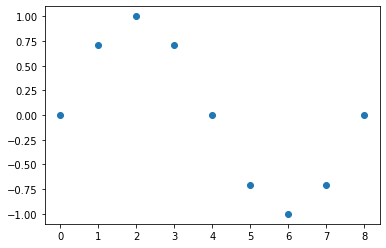

In [26]:
x = np.array([np.sin(0),
              np.sin(np.pi / 4),
              np.sin(np.pi / 2),
              np.sin(np.pi * 3 / 4),
              np.sin(np.pi),
              np.sin(np.pi * 5 / 4),
              np.sin(np.pi * 3 / 2),
              np.sin(np.pi * 7 / 4),
              np.sin(np.pi * 2)])

plt.plot(x, 'o')

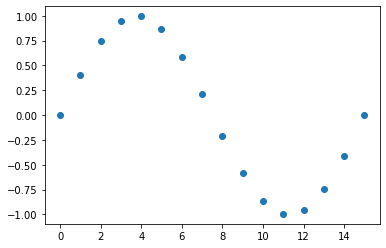

In [47]:
# for (int i = 0; i < num_samples; i++) {
# }

num_samples = 16
x = np.array([])

for i in range(0, num_samples):
    sample_value = np.sin(i / (num_samples - 1) * 2 * np.pi)
    x = np.append(x, sample_value)

plt.plot(x, 'o')

und jetzt in audio-rate:

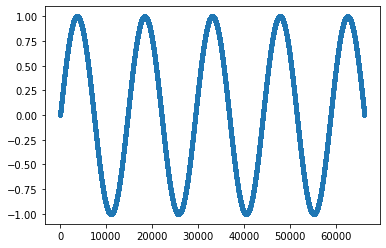

In [106]:
length = 1.5 # in sekunden
sample_rate = 44100
freq = 3

x = np.array([])

for i in range(0, int(sample_rate * length)):
    
    sample_value = np.sin(freq * i / sample_rate * 2 * np.pi)
    
    x = np.append(x, sample_value)

plt.plot(x, '.')

und jetzt hörbar

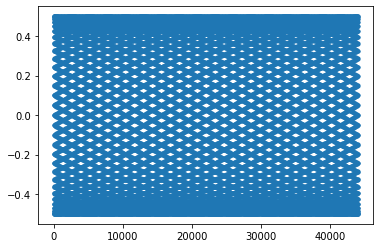

In [56]:
length = 1 # in sekunden
sample_rate = 44100
freq = 711

x = np.array([])

for i in range(0, int(sample_rate * length)):
    
    sample_value = np.sin(freq * i / (sample_rate - 1) * 2 * np.pi)

    sample_value = sample_value * 0.5 # amplitude
    
    x = np.append(x, sample_value)

plt.plot(x, '.')

In [54]:
from IPython.display import Audio

In [60]:
display(Audio(x, rate=sample_rate, normalize=True))
display(Audio(x, rate=sample_rate, normalize=False))

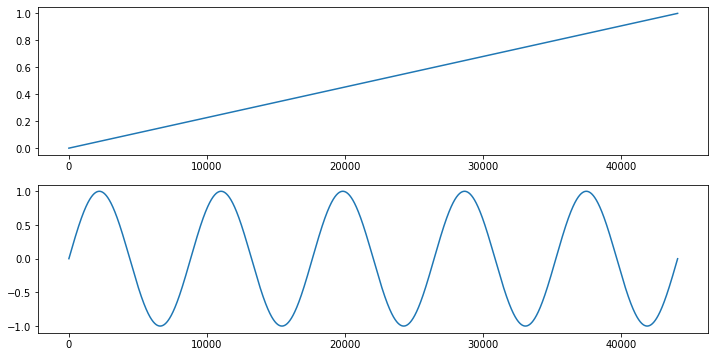

In [107]:
t = np.arange(0, 1, 1 / (sample_rate)) 

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t)
plt.subplot(2, 1, 2)
plt.plot(np.sin(2 * np.pi * t * 5))

In [ ]:
# dokumentation / auto-completion mit <Tab> oder <Shift>+<Tab>

# auto-completion:
np.ara

# dokumetation:
np.arange(

# Freq-to-MIDI
und andersrum

$440\ \mathrm{Hz}$

$440\ \mathrm{Hz} \cdot 2 = 880\ \mathrm{Hz}$ (Oktave)

$2 = \dfrac{880}{440}\ \mathrm{Hz}$ (Oktave)

--> Multiplikationsverhältnis im Frequenzbereich

$? = \dfrac{?}{440}\ \mathrm{Hz}$ (Halbton)

------------------

$f \cdot (2^{\frac{1}{12}})$ (Halbtonschritt)

$f \cdot (2^{\frac{2}{12}})$ (2 Halbtonschritte)

----------------------------

$69$

$69 + 12 = 81$ (Oktave)

$69 + 1 = 70$ (Halbton)

------------------

$f = 440 \cdot (2^{\frac{p - 69}{12}})$

$p = 12 \cdot \log_{2}(\dfrac{f}{440}) + 440$

In [84]:
def midi_to_freq(p):
    return 440 * (2 ** ((p - 69) / 12))

def freq_to_midi(f):
    
#     f                          = 440 * (2 ** ((p - 69) / 12)) | / 440
#     f / 440                    = 2 ** ((p - 69) / 12)         | log_2
#     np.log2(f / 440)           = (p - 69) / 12                | * 12
#     12 * np.log2(f / 440)      = p - 69                       | + 69
#     12 * np.log2(f / 440) + 69 = p                            | + 69

    return 12 * np.log2(f / 440) + 69

In [110]:
print(midi_to_freq(69))
print(midi_to_freq(70))
print(midi_to_freq(81))
print(midi_to_freq(60))
print(midi_to_freq(60.5)) # viertelton
print(midi_to_freq(60.25)) # achtelton

440.0
466.1637615180899
880.0
261.6255653005986
269.2917795270241
265.4309967761148


In [111]:
print(freq_to_midi(440.0))
print(freq_to_midi(466.1637615180899))
print(freq_to_midi(880.0))
print(freq_to_midi(261.6255653005986))
print(freq_to_midi(269.2917795270241))
print(freq_to_midi(265.4309967761148))

69.0
70.0
81.0
60.0
60.5
60.25


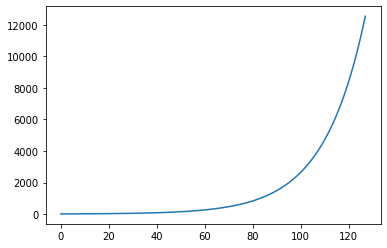

In [112]:
plt.plot(midi_to_freq(np.arange(0, 128)))

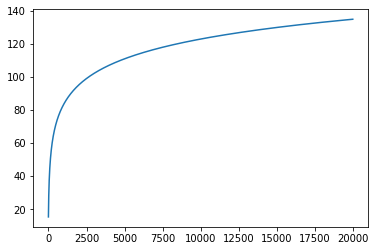

In [89]:
plt.plot(freq_to_midi(np.arange(20, 20000)))